In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xs=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
xs

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
xs.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
xs.shape

(4177, 9)

In [5]:
xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
xs.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
xs.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
xs.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [12]:
xs.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

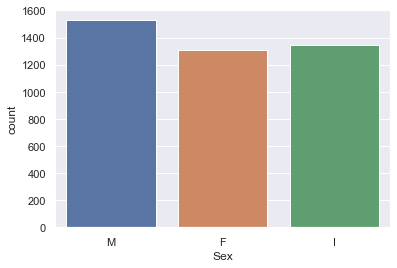

In [13]:
sns.countplot(x='Sex', data = xs)

In [16]:
xs['Age'] = xs['Rings'] + 1.5
xs['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [17]:
xs.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [18]:
xs['Sex'] = LabelEncoder().fit_transform(xs['Sex'].tolist())

In [22]:
transformed_sex_feature = OneHotEncoder().fit_transform(xs['Sex'].values.reshape(-1,1)).toarray()
xs_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
xs = pd.concat([xs, xs_sex_encoded], axis=1)

In [23]:
Xtrain = xs.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = xs['Rings']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)

In [27]:
result_acc

0.2632342277012328

In [29]:
xs['newRings'] = np.where(xs['Rings'] > 10,1,0)

In [30]:
Xtrain = xs.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = xs['newRings']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [33]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)

In [34]:
result_acc

0.7722987672226251

In [35]:
from sklearn import svm

In [36]:
Xtrain = xs.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = xs['Rings']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [44]:
svmModel = svm.SVC(kernel='linear', C=86, gamma=86) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)

In [45]:
result_acc

0.38796229151559103

In [46]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)

In [47]:
result_acc

0.38143582306018853

In [57]:
new_xs = xs.copy()

In [58]:
new_xs['newRings_1'] = np.where(xs['Rings'] <= 8,1,0)
new_xs['newRings_2'] = np.where(((xs['Rings'] > 8) & (xs['Rings'] <= 10)), 2,0)
new_xs['newRings_3'] = np.where(xs['Rings'] > 10,3,0)

In [59]:
Xtrain = new_xs.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_xs['newRings']

In [61]:
Xtrain = new_xs.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_xs['newRings']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [65]:
svmModel = svm.SVC(kernel='rbf', C=21, gamma=135) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.9883973894126178

In [ ]:
So Abalone Data set got accuracy pf 98%.